In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import json

#load the data
#housedata = pd.read_csv("Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
incomedata = pd.read_csv("US counties - education vs per capita personal income - results-20221227-213216.csv")


In [6]:
incomedata.shape


(3006, 10)

In [7]:
incomedata.head()

,county_FIPS,state,county,per_capita_personal_income_2019,per_capita_personal_income_2020,per_capita_personal_income_2021,associate_degree_numbers_2016_2020,bachelor_degree_numbers_2016_2020,associate_degree_percentage_2016_2020,bachelor_degree_percentage_2015_2019
0,51013,VA,"Arlington, VA",97629,100687,107603,19573,132394,11.21,75.84
1,35028,NM,"Los Alamos, NM",72366,75949,81306,2766,9098,20.54,67.56
2,8013,CO,"Boulder, CO",79698,83173,89593,45834,135876,21.24,62.97
3,24027,MD,"Howard, MD",78013,82041,86380,42538,136792,19.49,62.67
4,36061,NY,"New York, NY",173525,175327,195543,167960,777483,13.43,62.18


In [9]:
#To check if the data is all there
missing_data = incomedata.isna().mean().sort_values()

<AxesSubplot: >

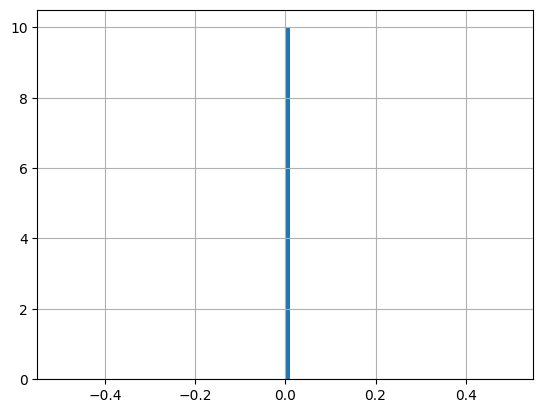

In [10]:
missing_data.hist(bins=100)

# Things we could learn
- Where did the value go down?
- Do degrees help grow the income for a county?
- What is the total GDP of the county?
- How does the GDP of the county corrilate to the house value


In [20]:
# Where did the value go down?
def income_diff(series: pd.Series) -> int : #next time use 3.9 so we can use more type safety
    per_capita_personal_income_2019 = series['per_capita_personal_income_2019']
    per_capita_personal_income_2021 = series['per_capita_personal_income_2021']
    return per_capita_personal_income_2021 - per_capita_personal_income_2019
    
incomedata["income_diff"] = incomedata.apply(income_diff, axis = 1)  #the 1 made it look at rows instead of columns (default)



In [24]:
incomedata.head()

,county_FIPS,state,county,per_capita_personal_income_2019,per_capita_personal_income_2020,per_capita_personal_income_2021,associate_degree_numbers_2016_2020,bachelor_degree_numbers_2016_2020,associate_degree_percentage_2016_2020,bachelor_degree_percentage_2015_2019,income_diff
0,51013,VA,"Arlington, VA",97629,100687,107603,19573,132394,11.21,75.84,9974
1,35028,NM,"Los Alamos, NM",72366,75949,81306,2766,9098,20.54,67.56,8940
2,8013,CO,"Boulder, CO",79698,83173,89593,45834,135876,21.24,62.97,9895
3,24027,MD,"Howard, MD",78013,82041,86380,42538,136792,19.49,62.67,8367
4,36061,NY,"New York, NY",173525,175327,195543,167960,777483,13.43,62.18,22018


array([[<AxesSubplot: title={'center': 'income_diff'}>]], dtype=object)

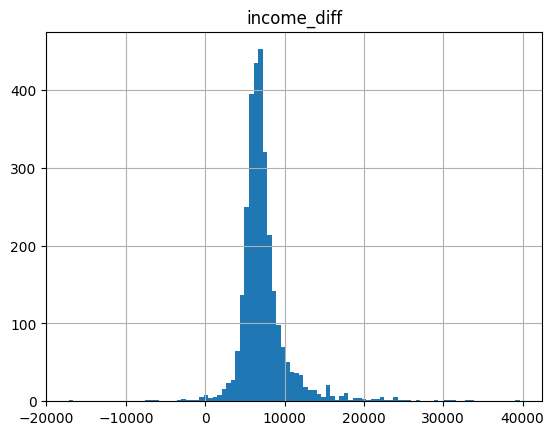

In [28]:
incomedata.hist(column='income_diff', bins=100)

In [29]:
# Some areas did go down, and we had some very wealthy areas where it shot up.
# Can we coorilate that house prices went up or down in response to income level?
